# Importing the required modules and loading the dataset

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

citizens = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [20]:
citizens.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Creating dummy variables

In [3]:
InternetService_unique_values =  pd.unique(citizens["InternetService"])
InternetService_unique_values

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [4]:
PaymentMethod_unique_values =  pd.unique(citizens["PaymentMethod"])
PaymentMethod_unique_values

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [5]:
Contract_unique_values =  pd.unique(citizens["Contract"])
Contract_unique_values

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [6]:
citizens['dummy_Partner'] = citizens.Partner.map({'Yes':1,'No':0})
citizens['dummy_PaymentMethod'] = citizens.PaymentMethod.map({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})
citizens['dummy_InternetService'] = citizens.InternetService.map({'DSL':0,'Fiber optic':1, 'No':2})
citizens['dummy_Contract'] = citizens.Contract.map({'Month-to-month':0,'One year':1, 'Two year':2})
citizens.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,dummy_Partner,dummy_PaymentMethod,dummy_InternetService,dummy_Contract
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.5,No,0,1,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,1,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,2,0,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,1,0


# Creating train-test split

# Scaling the numerical variables

In [7]:
scaler = MinMaxScaler()
citizens[['tenure','MonthlyCharges']] = scaler.fit_transform(citizens[['tenure','MonthlyCharges']])
citizens.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,dummy_Partner,dummy_PaymentMethod,dummy_InternetService,dummy_Contract
0,7590-VHVEG,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,0.115423,29.85,No,1,0,0,0
1,5575-GNVDE,Male,0,No,No,0.472222,Yes,No,DSL,Yes,...,One year,No,Mailed check,0.385075,1889.5,No,0,1,0,1
2,3668-QPYBK,Male,0,No,No,0.027778,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,0.354229,108.15,Yes,0,1,0,0
3,7795-CFOCW,Male,0,No,No,0.625000,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),0.239303,1840.75,No,0,2,0,1
4,9237-HQITU,Female,0,No,No,0.027778,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,0.521891,151.65,Yes,0,0,1,0


In [8]:
X = citizens[['SeniorCitizen','tenure','MonthlyCharges','dummy_Partner','dummy_PaymentMethod','dummy_InternetService','dummy_Contract']]
y = citizens['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

# Creating the classifier object

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

# Training the classifier using the training data

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Estimating the accuracy of the classifier on future data using the test data

In [11]:
knn.score(X_test, y_test)

0.7666098807495741

# Using the trained k-NN classifier model to classify new previously unseen objects

In [12]:
citizens_churn_prediction = knn.predict([[0,0.954,0.2,0,1,2,0]])
citizens_churn_prediction[0]

'No'

In [13]:
citizens_churn_prediction = knn.predict([[0,0.15,0.58,0,1,1,1]])
citizens_churn_prediction[0]

'No'

In [14]:
citizens_churn_prediction = knn.predict([[0,0,0.256,0,1,2,0]])
citizens_churn_prediction[0]

'No'

In [15]:
citizens_churn_prediction = knn.predict([[0,0.255,0.999,0,1,2,0]])
citizens_churn_prediction[0]

'No'

# Visualizing how sensitive is k-NN classification accuracy to the choice of the 'k' parameter :

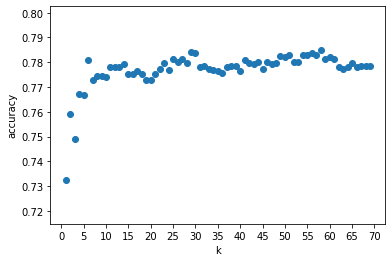

In [16]:
k_range = range(1,70)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70]);

# => In this case, the optimal "k" which optimizes the classification accuracy is roughly 69

In [17]:
k_accuarcy_df = pd.DataFrame(k_range,scores)
k_accuarcy_df.max()

0    69
dtype: int64

In [18]:
k_accuarcy_df

,0
0.732538,1
0.759228,2
0.749006,3
0.767178,4
0.766610,5
...,...
0.779671,65
0.777967,66
0.778535,67
0.778535,68
